## **EDA Lab 8: 28th Feb, 2025**
 
### **Name: Soumyadeep Ganguly**
### **Reg No: 24MDT0082**


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import NearestNeighbors
from scipy.stats import chi2, zscore

In [17]:
np.random.seed(42)
n_samples = 600
mean = [0,0]
cov = [[1, 0.5], [0.5, 1]]


In [18]:
data_normal = np.random.multivariate_normal(mean, cov, n_samples)
n_outliers = 15
data_outliers = np.random.uniform(low=-6, high=6, size=(n_outliers, 2))
data_all = np.vstack([data_normal, data_outliers])
df = pd.DataFrame(data_all, columns=[ 'Feature1', 'Feature2'])


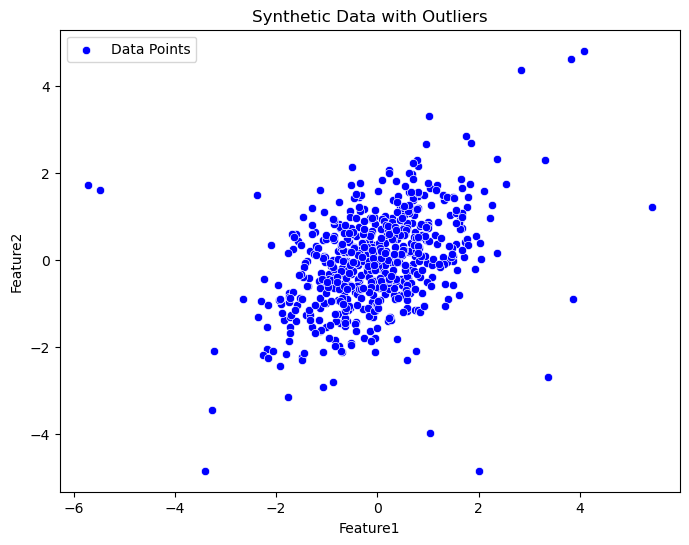

In [19]:
plt.figure(figsize=(8, 6)) 
sns.scatterplot(x='Feature1', y='Feature2', data=df, color='blue', label='Data Points')
plt.title('Synthetic Data with Outliers') 
plt.xlabel('Feature1') 
plt.ylabel('Feature2') 
plt.legend() 
plt.show() 


## **Z Score Method**

In [20]:
df_z = df.copy()
df_z['Z Feature1'] = zscore(df[ 'Feature1'])
df_z['Z Feature2'] = zscore(df['Feature2'])

threshold = 3
df_z['Outlier_z'] = (df_z['Z Feature1'].abs() > threshold) | (df_z['Z Feature2'].abs() > threshold)


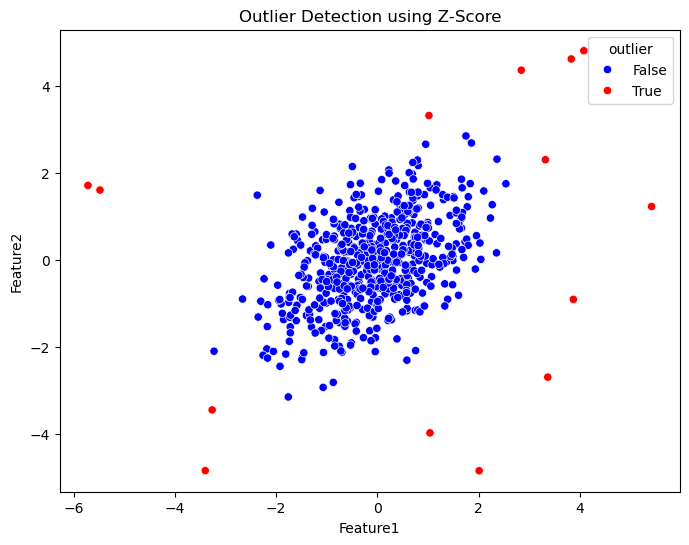

Z-Score method detected outliers: 14


In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature1', y='Feature2', data=df_z, hue='Outlier_z', palette={False: 'blue', True: 'red'})
plt.title('Outlier Detection using Z-Score')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(title='outlier')
plt.show()
print('Z-Score method detected outliers:', df_z['Outlier_z'].sum())


In [44]:
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [45]:
feature1 = "mpg"
feature2 = "wt"

mtcars[feature1+"_zscore"] = zscore(mtcars[feature1])
mtcars[feature2+"_zscore"] = zscore(mtcars[feature2])

threshold = 3
mtcars[feature1+"_"+feature2+"_"+'Outlier_z'] = (mtcars[feature1+"_zscore"].abs() > threshold) | (mtcars[feature2+"_zscore"].abs() > threshold)

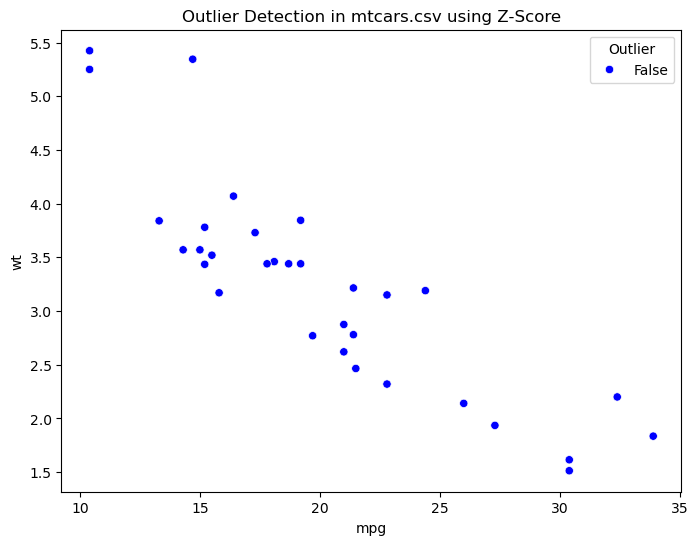

Z-Score method detected outliers in mtcars.csv: 0


In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=feature1, y=feature2, data=mtcars, hue=feature1+"_"+feature2+"_"+'Outlier_z', palette={False: 'blue', True: 'red'})
plt.title('Outlier Detection in mtcars.csv using Z-Score')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend(title='Outlier')
plt.show()
print('Z-Score method detected outliers in mtcars.csv:', mtcars[feature1+"_"+feature2+"_"+'Outlier_z'].sum())

### There is no outliers get detected after analysing "wt" and "mpg" features

## **IQR Method**

In [48]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR =Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_iqr = ((df < lower_bound) | (df > upper_bound)).any(axis=1)
df['outlier IQR'] = outlier_iqr



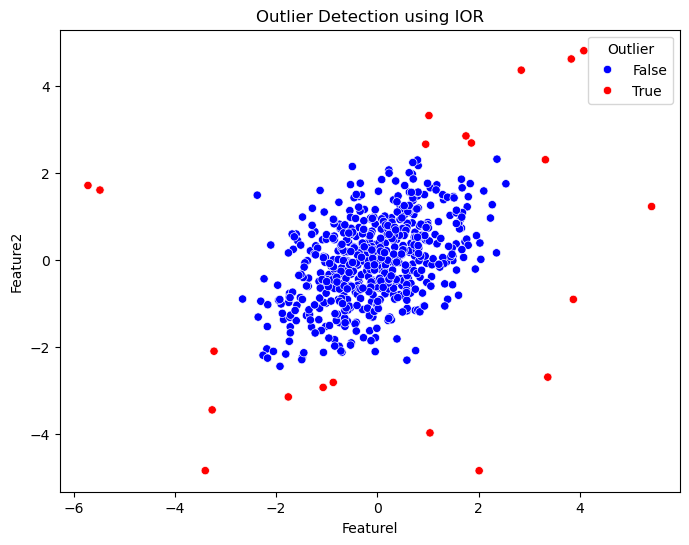

In [49]:
plt. figure(figsize=(8, 6))
sns.scatterplot (x='Feature1', y='Feature2', data=df, hue='outlier IQR', palette={False: 'blue', True:'red'})
plt.title('Outlier Detection using IOR')
plt.xlabel('Featurel')
plt.ylabel('Feature2')
plt.legend(title='Outlier')
plt.show()

In [50]:
print('IQR method detected outliers:', df['outlier IQR'].sum())

IQR method detected outliers: 21
